## 1

By Pandas Datareader and Yahoo Finance load 10 biggest performers in the year 2018 on SP500 market

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime, date
import pandas_datareader as pdr

In [3]:
def get_stock_data(ticker, start, end): 
    return pdr.get_data_yahoo(ticker, start, end)

In [4]:
start_date = datetime(year=2018, month=1, day=1)
end_date = datetime(year=2018, month=12, day=31)

In [5]:
def get_data_multiple_stocks(tickers, start, end):
    stocks = dict()
    for ticker in tickers: 
        stocks[ticker] = get_stock_data(ticker, start, end)
        stocks[ticker]['Ticker']=ticker
    return stocks

The top 10 S&P 500 stocks that rose the most during 2018 (according to www.marketwatch.com): Advanced Micro Devices (AMD), ABIOMED (ABMD), Fortnet (FTNT), Advance Auto Parts (AAP), TripAdvisor (TRIP), Chipotle Mexican Grill (CMG), Keysight Technologies (KEYS),Red Hat (RHT), O'Reilly Automotive (ORLY)
Boston Scientific (BSX)

In [6]:
raw = get_data_multiple_stocks([
    'AMD', 'ABMD', 'FTNT', 'AAP', 'TRIP', 'CMG', 'KEYS','RHT', 'ORLY', 'BSX'
], start_date, end_date)

In [7]:
raw['ABMD'][:5]

,High,Low,Open,Close,Volume,Adj Close,Ticker
Date,,,,,,,
2018-01-02,193.360001,188.050003,188.130005,192.490005,233700,192.490005,ABMD
2018-01-03,196.479996,192.529999,193.289993,195.820007,208800,195.820007,ABMD
2018-01-04,200.139999,197.270004,198.000000,199.250000,300700,199.250000,ABMD
2018-01-05,202.960007,200.779999,200.779999,202.320007,277400,202.320007,ABMD
2018-01-08,211.339996,204.669998,208.240005,207.800003,387400,207.800003,ABMD


In [8]:

def pivot_tickers_to_columns(raw, column):
    items = []
    for key in raw:
        data = raw[key]
        subset = data[['Ticker', column]]
        items.append(subset)
    
    combined = pd.concat(items)
    ri = combined.reset_index()
    return ri.pivot('Date', 'Ticker', column)

In [9]:
close_px = pivot_tickers_to_columns(raw, 'Close')
close_px[:5]

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Date,,,,,,,,,,
2018-01-02,106.089996,192.490005,10.98,25.280001,292.950012,44.349998,42.150002,249.259995,121.040001,34.770000
2018-01-03,107.050003,195.820007,11.55,25.559999,309.000000,45.029999,42.750000,253.839996,123.059998,34.970001
2018-01-04,111.000000,199.250000,12.12,25.320000,307.109985,44.000000,42.959999,257.679993,123.980003,34.919998
2018-01-05,112.180000,202.320007,11.88,25.969999,313.790009,44.099998,43.919998,260.279999,124.139999,34.730000
2018-01-08,111.389999,207.800003,12.28,25.809999,318.470001,45.000000,44.570000,260.000000,125.209999,34.669998


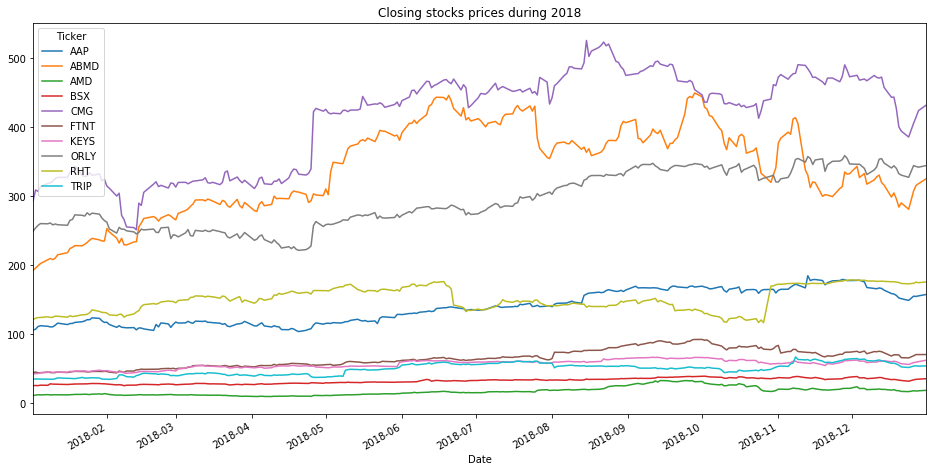

In [16]:
close_px.plot(figsize=(16,8))
plt.title('Closing stocks prices during 2018')
plt.show()

## 2 


User resampling to compare mean and median weekly, monthly and quarterly returns for these 10 firms

In [17]:
daily_pc=close_px/close_px.shift(1)-1
daily_pc[:5]
#Calculating the simple daily percentage change in closing price

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.009049,0.017300,0.051913,0.011076,0.054787,0.015333,0.014235,0.018374,0.016689,0.005752
2018-01-04,0.036899,0.017516,0.049351,-0.009390,-0.006117,-0.022874,0.004912,0.015128,0.007476,-0.001430
2018-01-05,0.010631,0.015408,-0.019802,0.025671,0.021751,0.002273,0.022346,0.010090,0.001290,-0.005441
2018-01-08,-0.007042,0.027086,0.033670,-0.006161,0.014914,0.020408,0.014800,-0.001076,0.008619,-0.001728


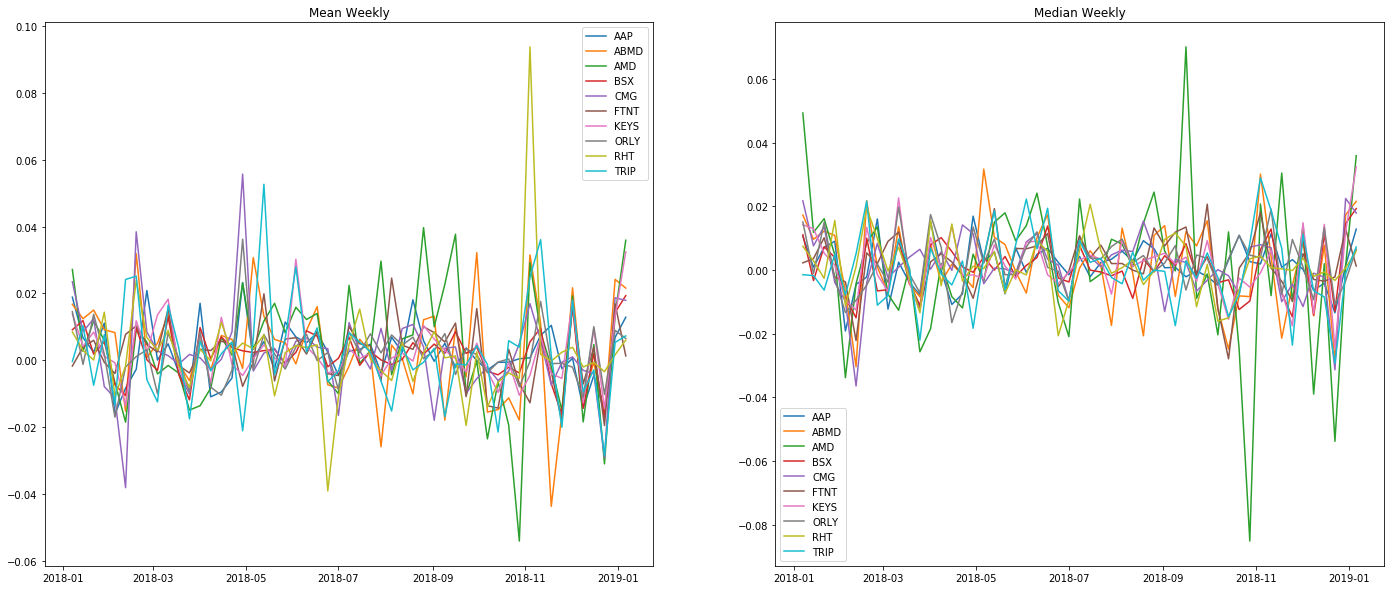

In [18]:
mean_W=pd.DataFrame(daily_pc.resample('W').mean())
median_W=pd.DataFrame(daily_pc.resample('W').median())

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.plot(mean_W)
plt.legend(mean_W.columns)
plt.title('Mean Weekly')

plt.subplot(1, 2, 2)
plt.plot(median_W)
plt.legend(median_W.columns)
plt.title('Median Weekly')

plt.show()

In [19]:
weekly = pd.DataFrame( columns = ['Mean_Max','Median_Max', 'Mean_Min','Median_Min'])
weekly['Mean_Max']=mean_W.max()
weekly['Mean_Min']=mean_W.min()
weekly['Median_Max']=median_W.max()
weekly['Median_Min']=median_W.min()
weekly

,Mean_Max,Median_Max,Mean_Min,Median_Min
Ticker,,,,
AAP,0.023256,0.016962,-0.016144,-0.019116
ABMD,0.032214,0.031733,-0.043800,-0.030330
AMD,0.039696,0.070100,-0.054186,-0.085106
BSX,0.019325,0.019325,-0.016996,-0.014970
CMG,0.055730,0.022509,-0.038190,-0.036388
FTNT,0.024585,0.020707,-0.019554,-0.027875
KEYS,0.032430,0.032430,-0.014486,-0.024586
ORLY,0.036235,0.019810,-0.017089,-0.016477
RHT,0.093827,0.020695,-0.039182,-0.020624


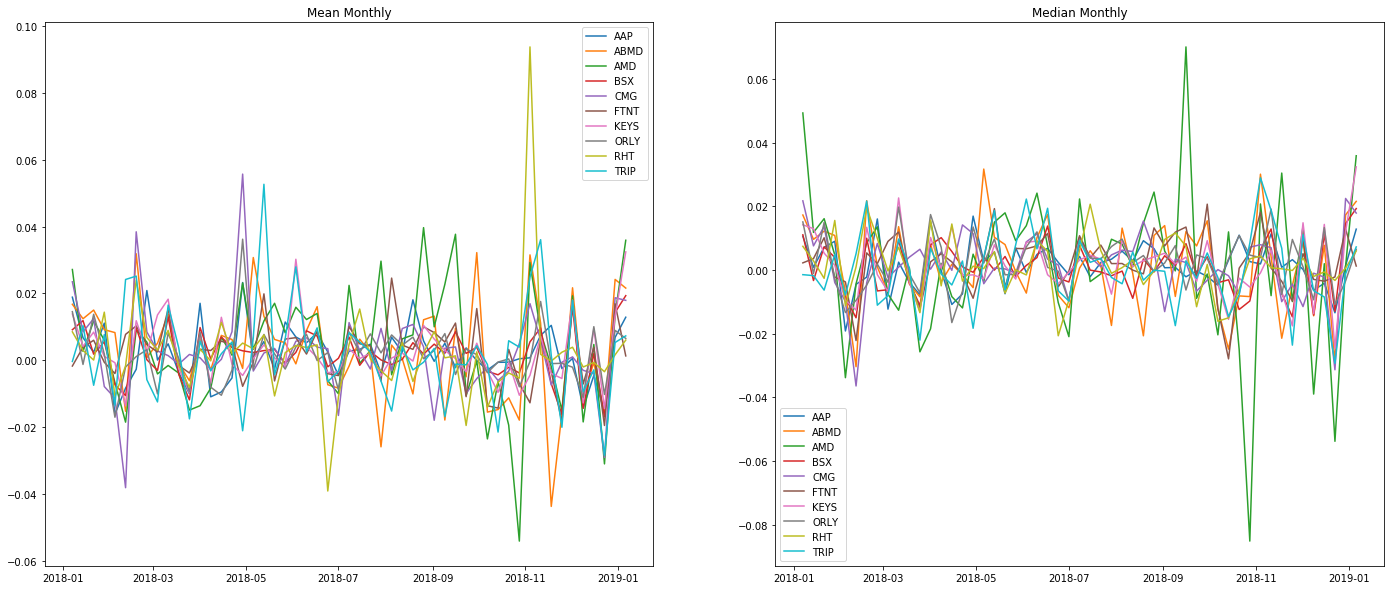

In [20]:
mean_M=pd.DataFrame(daily_pc.resample('M').mean())
median_M=pd.DataFrame(daily_pc.resample('M').median())

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.plot(mean_W)
plt.legend(mean_W.columns)
plt.title('Mean Monthly')

plt.subplot(1, 2, 2)
plt.plot(median_W)
plt.legend(median_W.columns)
plt.title('Median Monthly')

plt.show()

In [21]:
monthly = pd.DataFrame( columns = ['Mean_Max','Median_Max', 'Mean_Min','Median_Min'])
monthly['Mean_Max']=mean_M.max()
monthly['Mean_Min']=mean_M.min()
monthly['Median_Max']=median_M.max()
monthly['Median_Min']=median_M.min()
monthly

,Mean_Max,Median_Max,Mean_Min,Median_Min
Ticker,,,,
AAP,0.006685,0.008840,-0.006193,-0.004470
ABMD,0.011167,0.010750,-0.011481,-0.009849
AMD,0.014229,0.013447,-0.021001,-0.020331
BSX,0.005253,0.007141,-0.002958,-0.003947
CMG,0.014250,0.007227,-0.004488,-0.009786
FTNT,0.012914,0.009047,-0.004707,-0.006242
KEYS,0.006087,0.004154,-0.006291,-0.004428
ORLY,0.005421,0.005955,-0.003978,-0.004717
RHT,0.013737,0.009617,-0.008342,-0.006051


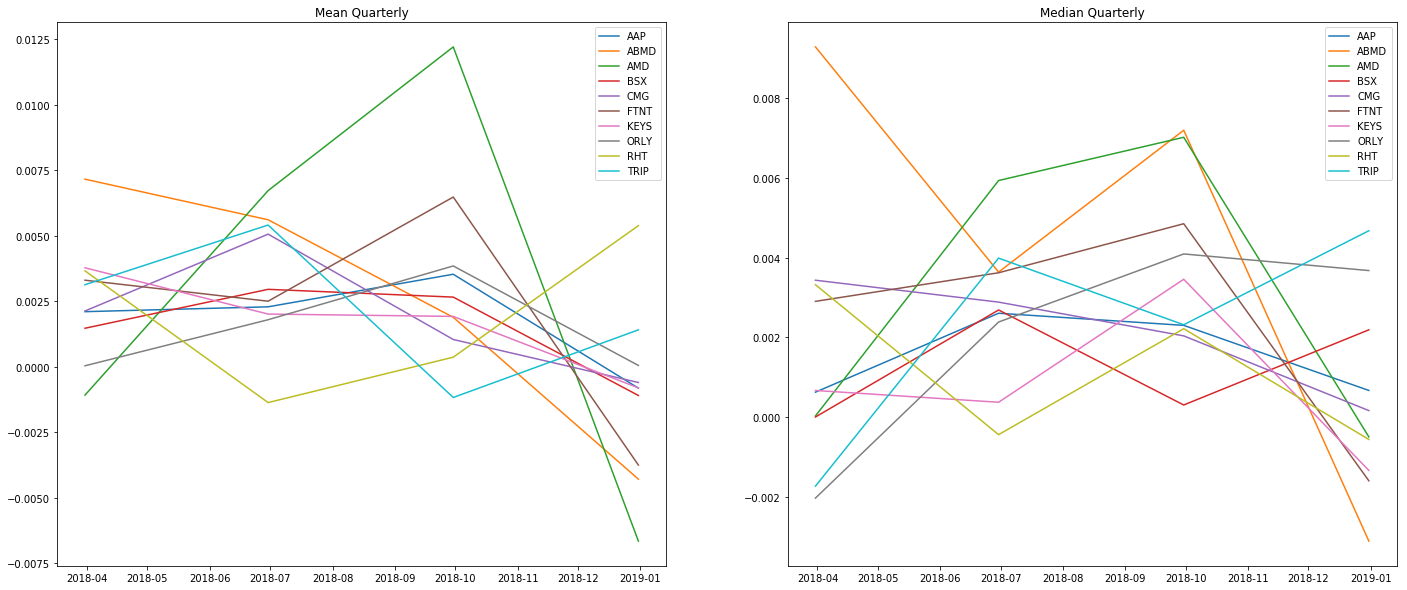

In [22]:
mean_Q=pd.DataFrame(daily_pc.resample('Q').mean())
median_Q=pd.DataFrame(daily_pc.resample('Q').median())

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.plot(mean_Q)
plt.legend(mean_Q.columns)
plt.title('Mean Quarterly')

plt.subplot(1, 2, 2)
plt.plot(median_Q)
plt.legend(median_Q.columns)
plt.title('Median Quarterly')

plt.show()

In [23]:
quarterly = pd.DataFrame( columns = ['Mean_Max','Median_Max', 'Mean_Min','Median_Min'])
quarterly['Mean_Max']=mean_M.max()
quarterly['Mean_Min']=mean_M.min()
quarterly['Median_Max']=median_M.max()
quarterly['Median_Min']=median_M.min()
quarterly

,Mean_Max,Median_Max,Mean_Min,Median_Min
Ticker,,,,
AAP,0.006685,0.008840,-0.006193,-0.004470
ABMD,0.011167,0.010750,-0.011481,-0.009849
AMD,0.014229,0.013447,-0.021001,-0.020331
BSX,0.005253,0.007141,-0.002958,-0.003947
CMG,0.014250,0.007227,-0.004488,-0.009786
FTNT,0.012914,0.009047,-0.004707,-0.006242
KEYS,0.006087,0.004154,-0.006291,-0.004428
ORLY,0.005421,0.005955,-0.003978,-0.004717
RHT,0.013737,0.009617,-0.008342,-0.006051


## 3
Determine two most correlated pair of quotes (i.e. firms) in your set

In [24]:
from pandas.plotting import scatter_matrix

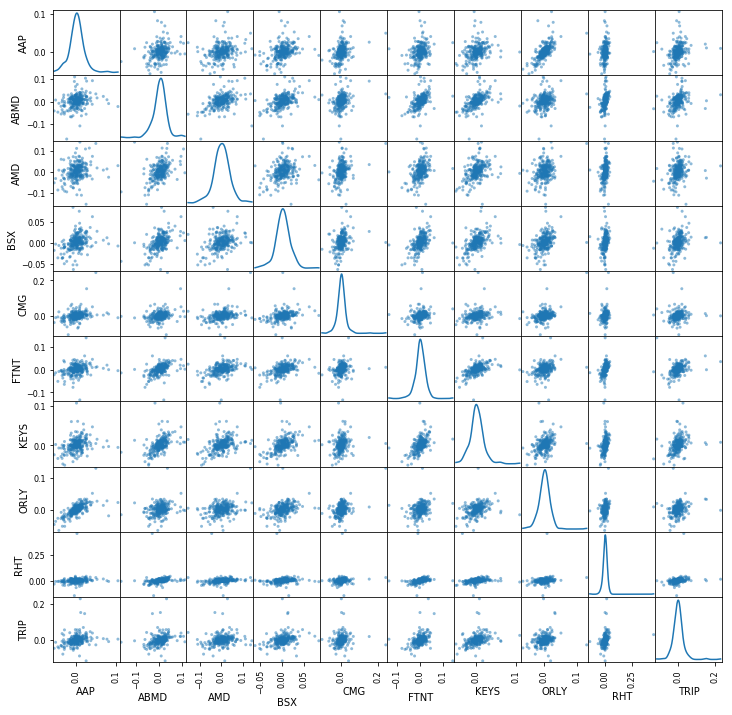

In [25]:
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

In [26]:
corrs = close_px.corr()
corrs

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Ticker,,,,,,,,,,
AAP,1.000000,0.527056,0.868378,0.948582,0.805777,0.894620,0.800551,0.974484,0.158228,0.728896
ABMD,0.527056,1.000000,0.568097,0.692868,0.793547,0.713979,0.840731,0.474882,0.174469,0.698082
AMD,0.868378,0.568097,1.000000,0.885120,0.698101,0.918975,0.804790,0.871042,-0.131102,0.497348
BSX,0.948582,0.692868,0.885120,1.000000,0.855643,0.945944,0.887753,0.924515,0.145462,0.746133
CMG,0.805777,0.793547,0.698101,0.855643,1.000000,0.816647,0.851131,0.789543,0.299386,0.811600
FTNT,0.894620,0.713979,0.918975,0.945944,0.816647,1.000000,0.918946,0.865049,0.072158,0.637744
KEYS,0.800551,0.840731,0.804790,0.887753,0.851131,0.918946,1.000000,0.752898,0.195884,0.746968
ORLY,0.974484,0.474882,0.871042,0.924515,0.789543,0.865049,0.752898,1.000000,0.119251,0.680578
RHT,0.158228,0.174469,-0.131102,0.145462,0.299386,0.072158,0.195884,0.119251,1.000000,0.479459


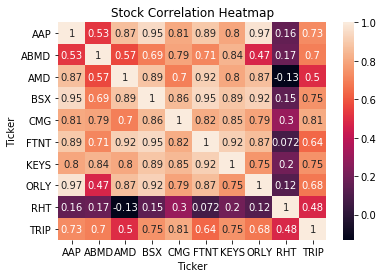

In [27]:
import seaborn as sns
plt.title('Stock Correlation Heatmap')
sns.heatmap(corrs, annot=True);

The most positively correlated are AAP&ORLY, AAP&BSX, BSX&FTNT

## 4
Determining risk relative to expected returns for your set of quotes and see if you can draw any conclusion on expected return vs risk

In [28]:
daily_pc.std()

Ticker
AAP     0.019938
ABMD    0.030002
AMD     0.039605
BSX     0.018179
CMG     0.027793
FTNT    0.023242
KEYS    0.017713
ORLY    0.017983
RHT     0.034033
TRIP    0.030308
dtype: float64

In [29]:
daily_pc.mean()

Ticker
AAP     0.001776
ABMD    0.002551
AMD     0.002863
BSX     0.001505
CMG     0.001919
FTNT    0.002122
KEYS    0.001704
ORLY    0.001452
RHT     0.001980
TRIP    0.002197
dtype: float64

In [30]:
daily_pc.columns

Index(['AAP', 'ABMD', 'AMD', 'BSX', 'CMG', 'FTNT', 'KEYS', 'ORLY', 'RHT',
       'TRIP'],
      dtype='object', name='Ticker')

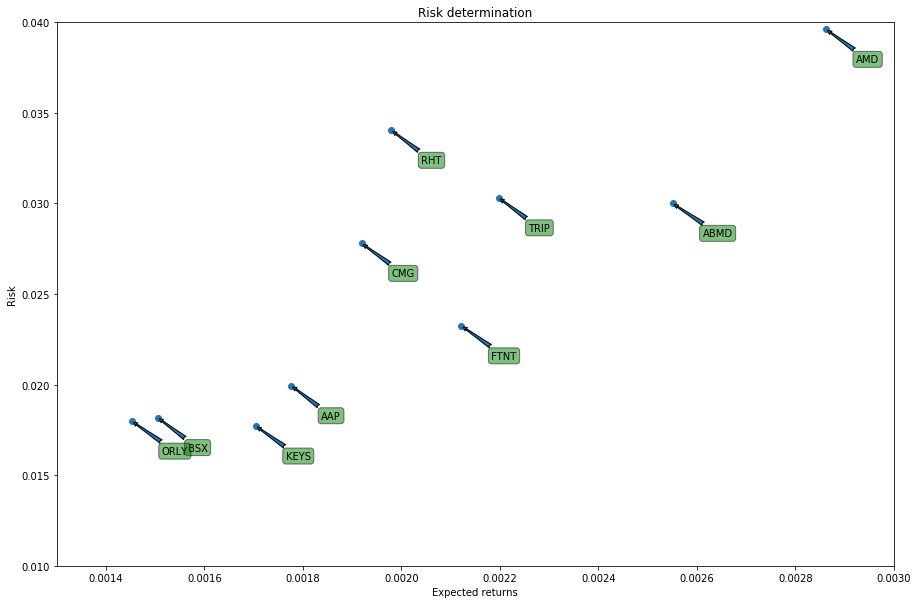

In [31]:
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Risk determination')
for label, x, y in zip(daily_pc.columns,
                      daily_pc.mean(),
                      daily_pc.std()):
    plt.annotate(
    label,
    xy= (x,y), xytext= (30,-30),
    textcoords='offset points', ha='left', va= 'center', 
        bbox=dict(boxstyle='round,pad=0.3', 
                  fc='green', 
                  alpha=0.5), 
        arrowprops= dict(arrowstyle='fancy', 
                         connectionstyle='arc3,rad=0'))
    
plt.xlim(0.0013, 0.0030)
plt.ylim(0.01, 0.040)
    
plt.gcf().set_size_inches(15,10)

We can see that AMD stock was the most risky, but the most profitable.ORLY and BSX are the least risky and the least profitable. KEYS had the least risk as well, however bigger profit than the previous two stocks. I would invest in FTNT because it has the 4th maximum profit and the 5th minimum risk. If we take into consideration the next less risky stock after FTNT it would be AAP, however its profit is 7th max. 